In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
df = pd.read_csv("Country-data.csv")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


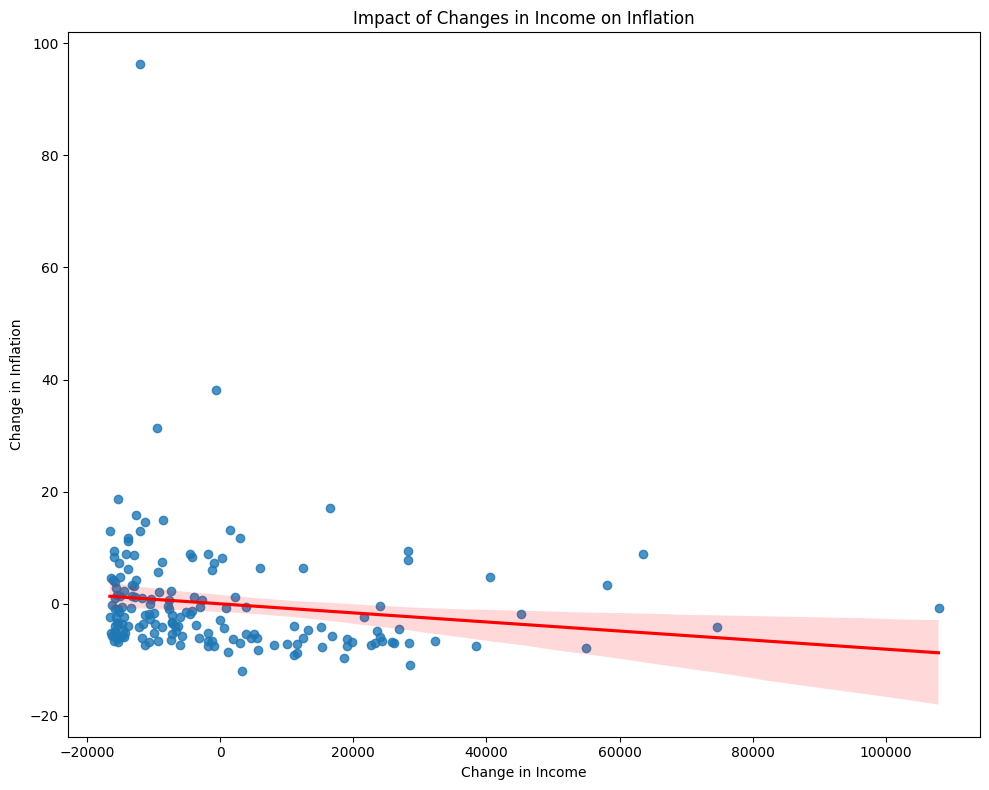

In [ ]:
df['income_change'] = df['income'] - df['income'].mean()
df['inflation_change'] = df['inflation'] - df['inflation'].mean()


income_change = df['income_change']
inflation_change = df['inflation_change']
countries = df['country']


plt.figure(figsize=(10, 8))
sns.regplot(x=income_change, y=inflation_change, scatter=True, line_kws={'color': 'red'})
plt.xlabel('Change in Income')
plt.ylabel('Change in Inflation')
plt.title('Impact of Changes in Income on Inflation')




plt.tight_layout()
plt.show()

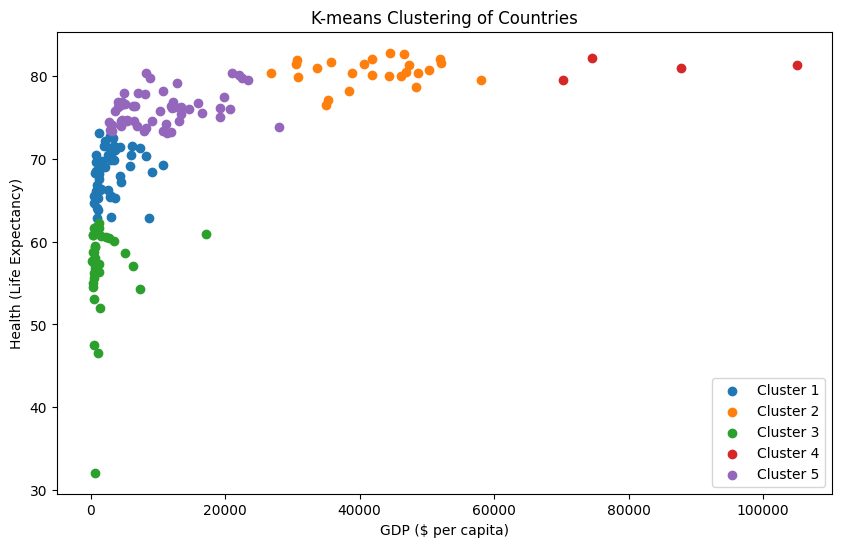

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler





features = ['gdpp', 'life_expec']


data.dropna(subset=features, inplace=True)

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Choose the number of clusters (k)
k = 5

# Perform k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Plot clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['gdpp'],
                cluster_data['life_expec'],
                label=f'Cluster {cluster + 1}')
plt.xlabel('GDP ($ per capita)')
plt.ylabel('Health (Life Expectancy)')
plt.title('K-means Clustering of Countries')
plt.legend()
plt.show()


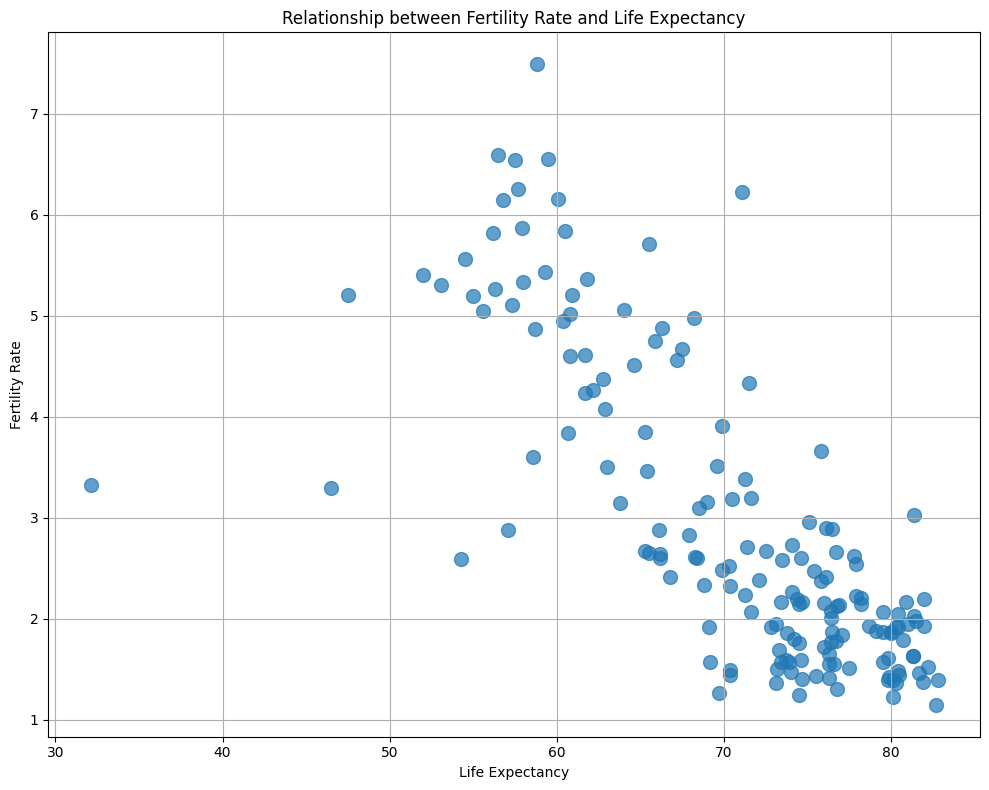

In [ ]:


fertility = df['total_fer']
life_expectancy = df['life_expec']


plt.figure(figsize=(10, 8))
plt.scatter(life_expectancy, fertility, s=100, alpha=0.7)
plt.xlabel('Life Expectancy')
plt.ylabel('Fertility Rate')
plt.title('Relationship between Fertility Rate and Life Expectancy')

plt.grid(True)
plt.tight_layout()
plt.show()


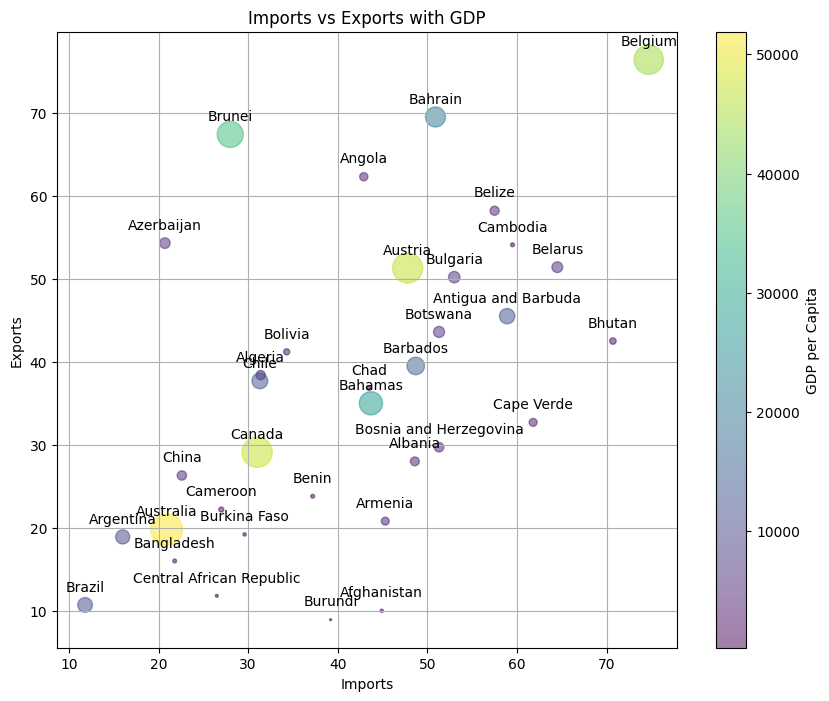

In [ ]:
imports = df['imports'].head(35)
exports = df['exports'].head(35)
gdp = df['gdpp'].head(35)
countries = df['country'].head(35)


plt.figure(figsize=(10, 8))
plt.scatter(imports, exports, s=gdp/100, alpha=0.5, c=gdp, cmap='viridis')
plt.colorbar(label='GDP per Capita')
plt.xlabel('Imports')
plt.ylabel('Exports')
plt.title('Imports vs Exports with GDP')


for i, country in enumerate(countries):
    plt.annotate(country, (imports[i], exports[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)

plt.show()

/var/folders/sf/2tffqfzx49x0_sjb8h4n__4m0000gn/T/ipykernel_83854/3996953482.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_fertility_by_gdp = df.groupby('gdp_range')['total_fer'].mean()


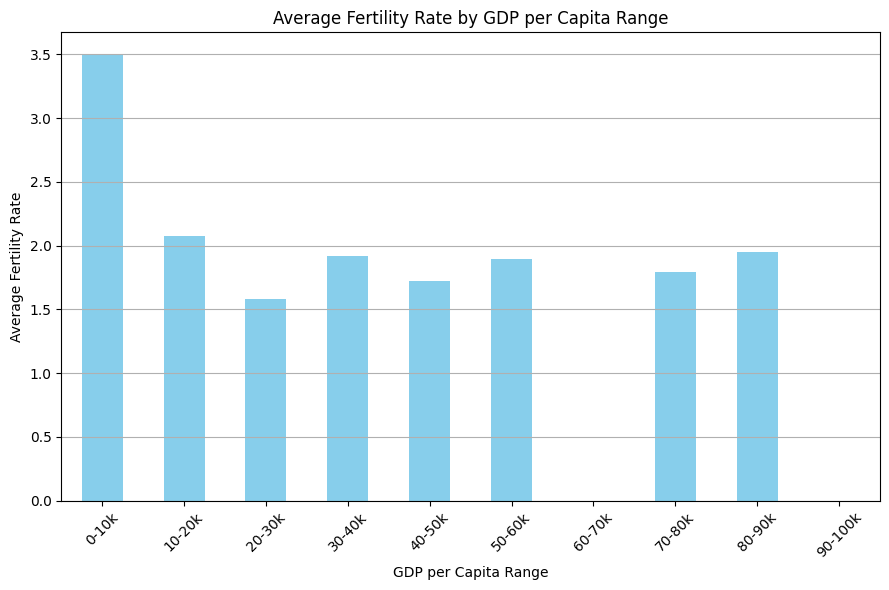

In [ ]:

bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
labels = ['0-10k', '10-20k', '20-30k', '30-40k', '40-50k', '50-60k', '60-70k', '70-80k', '80-90k', '90-100k']

# Bin the data by GDP per capita range and calculate the mean fertility rate for each bin
df['gdp_range'] = pd.cut(df['gdpp'], bins=bins, labels=labels)
mean_fertility_by_gdp = df.groupby('gdp_range')['total_fer'].mean()

# Create the bar plot
plt.figure(figsize=(9, 6))
mean_fertility_by_gdp.plot(kind='bar', color='skyblue')
plt.xlabel('GDP per Capita Range')
plt.ylabel('Average Fertility Rate')
plt.title('Average Fertility Rate by GDP per Capita Range')

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()